In [1]:
!pip install geocoder
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 98 kB 9.0 MB/s  eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |██████████████████████████

In [2]:
import pandas as pd
import requests
import numpy as np
import geocoder
import folium
import requests 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
import xml
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.io.json import json_normalize 
from sklearn.cluster import KMeans
from geopy.geocoders import Nominatim 
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print("All Required Libraries Imported!")

All Required Libraries Imported!


In [3]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
extracting_data = requests.get(url).text
wiki_data = BeautifulSoup(extracting_data, 'lxml')

In [4]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)

content = wiki_data.find('div', class_='mw-parser-output')
table = content.table.tbody
postcode = 0
borough = 0
neighborhood = 0

for tr in table.find_all('tr'):
    i = 0
    for td in tr.find_all('td'):
        if i == 0:
            postcode = td.text
            i = i + 1
        elif i == 1:
            borough = td.text
            i = i + 1
        elif i == 2: 
            neighborhood = td.text.strip('\n').replace(']','')
    toronto = toronto.append({'Postalcode': postcode,'Borough': borough,'Neighborhood': neighborhood},ignore_index=True)

In [7]:
lst=[]

for items in toronto['Postalcode']:
    lst.append(items)
lst

['\nM1ANot assigned\n\n',
 '\nM1BScarborough(Malvern / Rouge)\n\n',
 '\nM1CScarborough(Rouge Hill / Port Union / Highland Creek)\n\n',
 '\nM1EScarborough(Guildwood / Morningside / West Hill)\n\n',
 '\nM1GScarborough(Woburn)\n\n',
 '\nM1HScarborough(Cedarbrae)\n\n',
 '\nM1JScarborough(Scarborough Village)\n\n',
 '\nM1KScarborough(Kennedy Park / Ionview / East Birchmount Park)\n\n',
 '\nM1LScarborough(Golden Mile / Clairlea / Oakridge)\n\n',
 '\nM1MScarborough(Cliffside / Cliffcrest / Scarborough Village West)\n\n',
 '\nM1NScarborough(Birch Cliff / Cliffside West)\n\n',
 '\nM1PScarborough(Dorset Park / Wexford Heights / Scarborough Town Centre)\n\n',
 '\nM1RScarborough(Wexford / Maryvale)\n\n',
 '\nM1SScarborough(Agincourt) \n\n',
 "\nM1TScarborough(Clarks Corners / Tam O'Shanter / Sullivan)\n\n",
 "\nM1VScarborough(Milliken / Agincourt North / Steeles East / L'Amoreaux East)\n\n",
 "\nM1WScarborough(Steeles West / L'Amoreaux West)\n\n",
 '\nM1XScarborough(Upper Rouge)\n\n',
 '\nM1YNot a

In [8]:
for items in toronto['Borough']:
    lst.append(items)
for items in toronto['Neighborhood']:
    lst.append(items)
lst

['\nM1ANot assigned\n\n',
 '\nM1BScarborough(Malvern / Rouge)\n\n',
 '\nM1CScarborough(Rouge Hill / Port Union / Highland Creek)\n\n',
 '\nM1EScarborough(Guildwood / Morningside / West Hill)\n\n',
 '\nM1GScarborough(Woburn)\n\n',
 '\nM1HScarborough(Cedarbrae)\n\n',
 '\nM1JScarborough(Scarborough Village)\n\n',
 '\nM1KScarborough(Kennedy Park / Ionview / East Birchmount Park)\n\n',
 '\nM1LScarborough(Golden Mile / Clairlea / Oakridge)\n\n',
 '\nM1MScarborough(Cliffside / Cliffcrest / Scarborough Village West)\n\n',
 '\nM1NScarborough(Birch Cliff / Cliffside West)\n\n',
 '\nM1PScarborough(Dorset Park / Wexford Heights / Scarborough Town Centre)\n\n',
 '\nM1RScarborough(Wexford / Maryvale)\n\n',
 '\nM1SScarborough(Agincourt) \n\n',
 "\nM1TScarborough(Clarks Corners / Tam O'Shanter / Sullivan)\n\n",
 "\nM1VScarborough(Milliken / Agincourt North / Steeles East / L'Amoreaux East)\n\n",
 "\nM1WScarborough(Steeles West / L'Amoreaux West)\n\n",
 '\nM1XScarborough(Upper Rouge)\n\n',
 '\nM1YNot a

In [9]:
new_list=[]
for value in lst:
    new_value=value.replace('\n', '')
    new_list.append(new_value)
new_list

['M1ANot assigned',
 'M1BScarborough(Malvern / Rouge)',
 'M1CScarborough(Rouge Hill / Port Union / Highland Creek)',
 'M1EScarborough(Guildwood / Morningside / West Hill)',
 'M1GScarborough(Woburn)',
 'M1HScarborough(Cedarbrae)',
 'M1JScarborough(Scarborough Village)',
 'M1KScarborough(Kennedy Park / Ionview / East Birchmount Park)',
 'M1LScarborough(Golden Mile / Clairlea / Oakridge)',
 'M1MScarborough(Cliffside / Cliffcrest / Scarborough Village West)',
 'M1NScarborough(Birch Cliff / Cliffside West)',
 'M1PScarborough(Dorset Park / Wexford Heights / Scarborough Town Centre)',
 'M1RScarborough(Wexford / Maryvale)',
 'M1SScarborough(Agincourt) ',
 "M1TScarborough(Clarks Corners / Tam O'Shanter / Sullivan)",
 "M1VScarborough(Milliken / Agincourt North / Steeles East / L'Amoreaux East)",
 "M1WScarborough(Steeles West / L'Amoreaux West)",
 'M1XScarborough(Upper Rouge)',
 'M1YNot assigned',
 'M1ZNot assigned',
 'M2ANot assigned',
 'M2BNot assigned',
 'M2CNot assigned',
 'M2ENot assigned',


In [10]:
postal_list=[]
for value in new_list:
    postal_list.append(value[0:3])
postal_list

['M1A',
 'M1B',
 'M1C',
 'M1E',
 'M1G',
 'M1H',
 'M1J',
 'M1K',
 'M1L',
 'M1M',
 'M1N',
 'M1P',
 'M1R',
 'M1S',
 'M1T',
 'M1V',
 'M1W',
 'M1X',
 'M1Y',
 'M1Z',
 'M2A',
 'M2B',
 'M2C',
 'M2E',
 'M2G',
 'M2H',
 'M2J',
 'M2K',
 'M2L',
 'M2M',
 'M2N',
 'M2P',
 'M2R',
 'M2S',
 'M2T',
 'M2V',
 'M2W',
 'M2X',
 'M2Y',
 'M2Z',
 'M9A',
 'M9B',
 'M9C',
 'M9E',
 'M9G',
 'M9H',
 'M9J',
 'M9K',
 'M9L',
 'M9M',
 'M9N',
 'M9P',
 'M9R',
 'M9S',
 'M9T',
 'M9V',
 'M9W',
 'M9X',
 'M9Y',
 'M9Z']

In [11]:
borough_list=[]
for value in new_list:
    pos= value.find('(')
    new_value = value[3:pos]
    new_value = str(new_value)
    if new_value == 'Not assigne':
        new_value = new_value + 'd'
        borough_list.append(new_value)
    else:
        borough_list.append(new_value)
borough_list

['Not assigned',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Scarborough',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'North York',
 'North York',
 'North York',
 'North York',
 'North York',
 'North York',
 'North York',
 'North York',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Etobicoke',
 'Etobicoke',
 'Etobicoke',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'Not assigned',
 'North York',
 'North York',
 'York',
 'Etobicoke',
 'Etobicoke',
 'Not assigned',
 'Not assigned',
 'Etobicoke',
 'EtobicokeNorthwest',
 'Not assigned',
 'Not assigned',
 'Not assigned']

In [12]:
neighbourhood_list=[]
for value in new_list:
    pos1 = value.find('(')
    pos2 = value.find(')')
    neighbourhood_list.append(value[pos1+1:pos2])
neighbourhood_list

['M1ANot assigne',
 'Malvern / Rouge',
 'Rouge Hill / Port Union / Highland Creek',
 'Guildwood / Morningside / West Hill',
 'Woburn',
 'Cedarbrae',
 'Scarborough Village',
 'Kennedy Park / Ionview / East Birchmount Park',
 'Golden Mile / Clairlea / Oakridge',
 'Cliffside / Cliffcrest / Scarborough Village West',
 'Birch Cliff / Cliffside West',
 'Dorset Park / Wexford Heights / Scarborough Town Centre',
 'Wexford / Maryvale',
 'Agincourt',
 "Clarks Corners / Tam O'Shanter / Sullivan",
 "Milliken / Agincourt North / Steeles East / L'Amoreaux East",
 "Steeles West / L'Amoreaux West",
 'Upper Rouge',
 'M1YNot assigne',
 'M1ZNot assigne',
 'M2ANot assigne',
 'M2BNot assigne',
 'M2CNot assigne',
 'M2ENot assigne',
 'M2GNot assigne',
 'Hillcrest Village',
 'Fairview / Henry Farm / Oriole',
 'Bayview Village',
 'York Mills / Silver Hills',
 'Willowdale / Newtonbrook',
 'Willowdale',
 'York Mills West',
 'Willowdale',
 'M2SNot assigne',
 'M2TNot assigne',
 'M2VNot assigne',
 'M2WNot assigne',

In [13]:
new_neighbourhood_list= []
for value in neighbourhood_list:
    new_value=value.replace('/', ',')
    new_neighbourhood_list.append(new_value)
new_neighbourhood_list

['M1ANot assigne',
 'Malvern , Rouge',
 'Rouge Hill , Port Union , Highland Creek',
 'Guildwood , Morningside , West Hill',
 'Woburn',
 'Cedarbrae',
 'Scarborough Village',
 'Kennedy Park , Ionview , East Birchmount Park',
 'Golden Mile , Clairlea , Oakridge',
 'Cliffside , Cliffcrest , Scarborough Village West',
 'Birch Cliff , Cliffside West',
 'Dorset Park , Wexford Heights , Scarborough Town Centre',
 'Wexford , Maryvale',
 'Agincourt',
 "Clarks Corners , Tam O'Shanter , Sullivan",
 "Milliken , Agincourt North , Steeles East , L'Amoreaux East",
 "Steeles West , L'Amoreaux West",
 'Upper Rouge',
 'M1YNot assigne',
 'M1ZNot assigne',
 'M2ANot assigne',
 'M2BNot assigne',
 'M2CNot assigne',
 'M2ENot assigne',
 'M2GNot assigne',
 'Hillcrest Village',
 'Fairview , Henry Farm , Oriole',
 'Bayview Village',
 'York Mills , Silver Hills',
 'Willowdale , Newtonbrook',
 'Willowdale',
 'York Mills West',
 'Willowdale',
 'M2SNot assigne',
 'M2TNot assigne',
 'M2VNot assigne',
 'M2WNot assigne',

In [14]:
new_neighbourhood_list1= []
for value in new_neighbourhood_list:
    value = str(value)
    #print(value[3:])
    if value[3:] == 'Not assigne':
        #print(value)
        new_value= value.replace(value, 'NA')
        new_neighbourhood_list1.append(new_value)
    else:
        new_neighbourhood_list1.append(value)
new_neighbourhood_list1

['NA',
 'Malvern , Rouge',
 'Rouge Hill , Port Union , Highland Creek',
 'Guildwood , Morningside , West Hill',
 'Woburn',
 'Cedarbrae',
 'Scarborough Village',
 'Kennedy Park , Ionview , East Birchmount Park',
 'Golden Mile , Clairlea , Oakridge',
 'Cliffside , Cliffcrest , Scarborough Village West',
 'Birch Cliff , Cliffside West',
 'Dorset Park , Wexford Heights , Scarborough Town Centre',
 'Wexford , Maryvale',
 'Agincourt',
 "Clarks Corners , Tam O'Shanter , Sullivan",
 "Milliken , Agincourt North , Steeles East , L'Amoreaux East",
 "Steeles West , L'Amoreaux West",
 'Upper Rouge',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'Hillcrest Village',
 'Fairview , Henry Farm , Oriole',
 'Bayview Village',
 'York Mills , Silver Hills',
 'Willowdale , Newtonbrook',
 'Willowdale',
 'York Mills West',
 'Willowdale',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'Islington Avenue',
 'West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale',
 'Eringate , Bloordale

In [15]:
del toronto

In [16]:
column_names = ['Postalcode','Borough','Neighborhood']
toronto = pd.DataFrame(columns = column_names)
toronto

,Postalcode,Borough,Neighborhood


In [17]:
for x in range(0,60):
    post = postal_list[x]
    boro = borough_list[x]
    neighbour = new_neighbourhood_list1[x]
    toronto = toronto.append({'Postalcode': post,'Borough': boro,'Neighborhood': neighbour},ignore_index=True)

In [18]:
toronto

,Postalcode,Borough,Neighborhood
0,M1A,Not assigned,NA
1,M1B,Scarborough,"Malvern , Rouge"
2,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
3,M1E,Scarborough,"Guildwood , Morningside , West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae
6,M1J,Scarborough,Scarborough Village
7,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park"
8,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge"
9,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West"


In [19]:
toronto.describe()

,Postalcode,Borough,Neighborhood
count,60,60,60
unique,60,6,35
top,M9V,Not assigned,NA
freq,1,25,25


In [20]:
toronto = toronto.dropna()
empty = 'Not assigned'
toronto = toronto[(toronto.Postalcode != empty ) & (toronto.Borough != empty) & (toronto.Neighborhood != empty)]

In [21]:
toronto.head()

,Postalcode,Borough,Neighborhood
1,M1B,Scarborough,"Malvern , Rouge"
2,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
3,M1E,Scarborough,"Guildwood , Morningside , West Hill"
4,M1G,Scarborough,Woburn
5,M1H,Scarborough,Cedarbrae


In [32]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = toronto.groupby(['Postalcode', 'Borough'])
toronto2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')

In [33]:
toronto2.describe()

,Postalcode,Borough,Neighborhood
count,35,35,35
unique,35,5,34
top,M1V,Scarborough,Willowdale
freq,1,17,2


In [34]:
print(toronto2.shape)
toronto2.head()

(35, 3)


,Postalcode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern , Rouge"
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek"
2,M1E,Scarborough,"Guildwood , Morningside , West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [35]:
def get_latilong(postal_code):
    lati_long_coords = None
    while(lati_long_coords is None):
        g = geocoder.arcgis('{}, Toronto, Ontario'.format(postal_code))
        lati_long_coords = g.latlng
    return lati_long_coords
    
get_latilong('M4G')

[43.709020000000066, -79.36348999999996]

In [36]:
# Retrieving Postal Code Co-ordinates
postal_codes = toronto2['Postalcode']    
coords = [ get_latilong(postal_code) for postal_code in postal_codes.tolist() ]

In [37]:
# Adding Columns Latitude & Longitude
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
toronto2['Latitude'] = df_coords['Latitude']
toronto2['Longitude'] = df_coords['Longitude']

In [40]:
toronto2.head(10)

,Postalcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.81139,-79.19662
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.78574,-79.15875
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.76575,-79.17470
3,M1G,Scarborough,Woburn,43.76812,-79.21761
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892
5,M1J,Scarborough,Scarborough Village,43.74446,-79.23117
6,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park",43.72582,-79.26461
7,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge",43.71289,-79.28506
8,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West",43.72360,-79.23496
9,M1N,Scarborough,"Birch Cliff , Cliffside West",43.69510,-79.26466


In [43]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(c)
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The Geograpical Co-ordinate of Seattle,Washington are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Seattle,Washington are 43.7729744, -79.2576479.


In [44]:
map_Scarborough = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

for lat, lng, nei in zip(df_2['Latitude'], df_2['Longitude'], df_2['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Scarborough)  
    
map_Scarborough

In [46]:
address = 'Scarborough,Toronto'

geolocator = Nominatim(user_agent="week5-peergraded")
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The Geograpical Co-ordinate of Neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The Geograpical Co-ordinate of Neighborhood_1 are 43.7729744, -79.2576479.


In [47]:
CLIENT_ID = 'Z0USG4EBMOMOP4LG1WW2OAD4CIV3PRHK1UTQVDIHV1VWNZ1H' # my Foursquare ID
CLIENT_SECRET = 'INNZSHTEP3DWYTDYMSK3UAKAZMZ55CE1DROPYKCZGQZS2CBB' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: Z0USG4EBMOMOP4LG1WW2OAD4CIV3PRHK1UTQVDIHV1VWNZ1H
CLIENT_SECRET: INNZSHTEP3DWYTDYMSK3UAKAZMZ55CE1DROPYKCZGQZS2CBB


In [48]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [49]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [50]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [51]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Hot Topic,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775450,-79.257929
1,Tommy Hilfiger,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776015,-79.257369
2,lululemon athletica,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775517,-79.258423
3,New York Fries - Scarborough TC,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",43.775135,-79.256858
4,Subway,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",43.775102,-79.257115


In [52]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,Hot Topic,Clothing Store,43.775450,-79.257929
1,Tommy Hilfiger,Clothing Store,43.776015,-79.257369
2,lululemon athletica,Clothing Store,43.775517,-79.258423
3,New York Fries - Scarborough TC,Restaurant,43.775135,-79.256858
4,Subway,Sandwich Place,43.775102,-79.257115


In [53]:
# Top 10 Categories
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store        6
Restaurant            5
Coffee Shop           3
Sandwich Place        2
Department Store      2
Pharmacy              2
Gas Station           2
Movie Theater         1
Light Rail Station    1
Video Game Store      1
Name: categories, dtype: int64

In [54]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
# Nearby Venues
Scarborough_venues = getNearbyVenues(names=toronto2['Neighborhood'],
                                   latitudes=toronto2['Latitude'],
                                   longitudes=toronto2['Longitude']
                                  )

Malvern , Rouge
Rouge Hill , Port Union , Highland Creek
Guildwood , Morningside , West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park , Ionview , East Birchmount Park
Golden Mile , Clairlea , Oakridge
Cliffside , Cliffcrest , Scarborough Village West
Birch Cliff , Cliffside West
Dorset Park , Wexford Heights , Scarborough Town Centre
Wexford , Maryvale
Agincourt
Clarks Corners , Tam O'Shanter , Sullivan
Milliken , Agincourt North , Steeles East , L'Amoreaux East
Steeles West , L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview , Henry Farm , Oriole
Bayview Village
York Mills , Silver Hills
Willowdale , Newtonbrook
Willowdale
York Mills West
Willowdale
Islington Avenue
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Humber Summit
Humberlea , Emery
Weston
Westmount
Kingsview Village , St. Phillips , Martin Grove Gardens , Richview Gardens
South Steeles , Silverstone , Humbergate , Jam

In [57]:
print('There are {} Unique Categories.'.format(len(Scarborough_venues['Venue Category'].unique())))
Scarborough_venues.groupby('Neighborhood').count().head()

There are 121 Unique Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Birch Cliff , Cliffside West",6,6,6,6,6,6
Cedarbrae,8,8,8,8,8,8
"Clairville , Humberwood , Woodbine Downs , West Humber , Kipling Heights , Rexdale , Elms , Tandridge , Old Rexdale",9,9,9,9,9,9


In [58]:
# one hot encoding
Scarborough_onehot = pd.get_dummies(Scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Scarborough_onehot['Neighborhood'] = Scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Scarborough_onehot.columns[-1]] + list(Scarborough_onehot.columns[:-1])
Scarborough_onehot = Scarborough_onehot[fixed_columns]
Scarborough_grouped = Scarborough_onehot.groupby('Neighborhood').mean().reset_index()
Scarborough_onehot.head(5)

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,Automotive Shop,Baby Store,Bakery,Bank,Bar,Baseball Field,Beer Store,Big Box Store,Bistro,Boutique,Breakfast Spot,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Rec Center,College Stadium,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Diner,Discount Store,Electronics Store,Fast Food Restaurant,Financial or Legal Service,Fish & Chips Shop,Flea Market,Flower Shop,Food Court,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,General Entertainment,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hakka Restaurant,Health Food Store,History Museum,Home Service,Hong Kong Restaurant,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Locksmith,Market,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Moving Target,Nightclub,Optical Shop,Other Great Outdoors,Paintball Field,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Ramen Restaurant,Rental Service,Residential Building (Apartment / Condo),Restaurant,Salon / Barbershop,Sandwich Place,Shanghai Restaurant,Shopping Mall,Skating Rink,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Video Game Store,Vietnamese Restaurant,Women's Store,Yoga Studio,Zoo Exhibit
0,"Malvern , Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Malvern , Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Malvern , Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Malvern , Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Malvern , Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
num_top_venues = 5
for hood in Scarborough_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Scarborough_grouped[Scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
              venue  freq
0     Shopping Mall  0.09
1       Pizza Place  0.04
2  Sushi Restaurant  0.04
3       Coffee Shop  0.04
4    Sandwich Place  0.04


---- Bayview Village ----
         venue  freq
0    Locksmith  0.25
1         Park  0.25
2        Trail  0.25
3  Flower Shop  0.25
4       Market  0.00


---- Birch Cliff , Cliffside West ----
                   venue  freq
0        College Stadium  0.17
1                    Gym  0.17
2  General Entertainment  0.17
3                   Café  0.17
4           Skating Rink  0.17


---- Cedarbrae ----
                  venue  freq
0           Gas Station  0.12
1      Hakka Restaurant  0.12
2            Playground  0.12
3       Thai Restaurant  0.12
4  Caribbean Restaurant  0.12


---- Clairville , Humberwood , Woodbine Downs , West Humber , Kipling Heights , Rexdale , Elms , Tandridge , Old Rexdale ----
             venue  freq
0      Gas Station  0.11
1      Coffee Shop  0.11
2  Auto Dealership  0.11
3      Auto G

In [60]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Scarborough_grouped['Neighborhood']

for ind in np.arange(Scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Shopping Mall,Park,Chinese Restaurant,Sandwich Place,Breakfast Spot,Pool,Pizza Place,Pharmacy,Café,Clothing Store
1,Bayview Village,Park,Trail,Flower Shop,Locksmith,Financial or Legal Service,College Stadium,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
2,"Birch Cliff , Cliffside West",Park,Skating Rink,College Stadium,Gym,Café,General Entertainment,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop
3,Cedarbrae,Thai Restaurant,Bakery,Hakka Restaurant,Playground,Athletics & Sports,Caribbean Restaurant,Gas Station,Bank,Electronics Store,Discount Store
4,"Clairville , Humberwood , Woodbine Downs , Wes...",Automotive Shop,Middle Eastern Restaurant,Coffee Shop,Gym,Restaurant,Auto Dealership,Auto Garage,Sandwich Place,Gas Station,Electronics Store


In [62]:
# Using K-Means to cluster neighborhood into 3 clusters
Scarborough_grouped_clustering = Scarborough_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Scarborough_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

In [63]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Scarborough_merged =toronto2.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Scarborough_merged = Scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Scarborough_merged.head()# check the last columns!

,Postalcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern , Rouge",43.81139,-79.19662,1,Zoo Exhibit,Paintball Field,Construction & Landscaping,Fast Food Restaurant,Financial or Legal Service,College Rec Center,Concert Hall,Convenience Store,Cosmetics Shop,Department Store
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.78574,-79.15875,1,Bar,Construction & Landscaping,Moving Target,Fish & Chips Shop,Zoo Exhibit,Flea Market,Concert Hall,Convenience Store,Cosmetics Shop,Department Store
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.76575,-79.17470,0,Park,Gymnastics Gym,Gym / Fitness Center,Athletics & Sports,Zoo Exhibit,Dessert Shop,Fast Food Restaurant,Electronics Store,Discount Store,Diner
3,M1G,Scarborough,Woburn,43.76812,-79.21761,0,Coffee Shop,Park,Chinese Restaurant,Fast Food Restaurant,Fish & Chips Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Department Store
4,M1H,Scarborough,Cedarbrae,43.76944,-79.23892,1,Thai Restaurant,Bakery,Hakka Restaurant,Playground,Athletics & Sports,Caribbean Restaurant,Gas Station,Bank,Electronics Store,Discount Store


In [64]:
kclusters = 10

In [65]:
# create map
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Scarborough_merged['Latitude'], 
                                   Scarborough_merged['Longitude'], 
                                   Scarborough_merged['Neighborhood'], 
                                   Scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [66]:
df1=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 0,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df2=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 1,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]
df3=Scarborough_merged.loc[Scarborough_merged['Cluster Labels'] == 2,Scarborough_merged.columns[[2] + list(range(5, Scarborough_merged.shape[1]))]]

In [74]:
Scarborough_Avg_HousingPrice=pd.DataFrame({"Neighborhood":toronto2["Neighborhood"],
                                      "Average_Housing_Price":[335000.0, 286600.0, 175000.0, 225900.0, 219400.0, 573900.0, 225000.0, 370500.0, 370500.0, 433500.0, 279200.0, 279200.0, 225000.0, 370500.0, 255400.0, 433500.0, 433500.0, 435000.0, 289500.0, 265000.0, 285900.0, 239400.0, 589900.0, 295000.0, 380500.0, 378500.0, 438500.0, 229200.0, 229200.0, 365000.0, 388500.0, 285400.0, 493500.0, 477500.0, 378000.0
                                                              
                                                              
                                                              ]})

In [75]:
Scarborough_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)

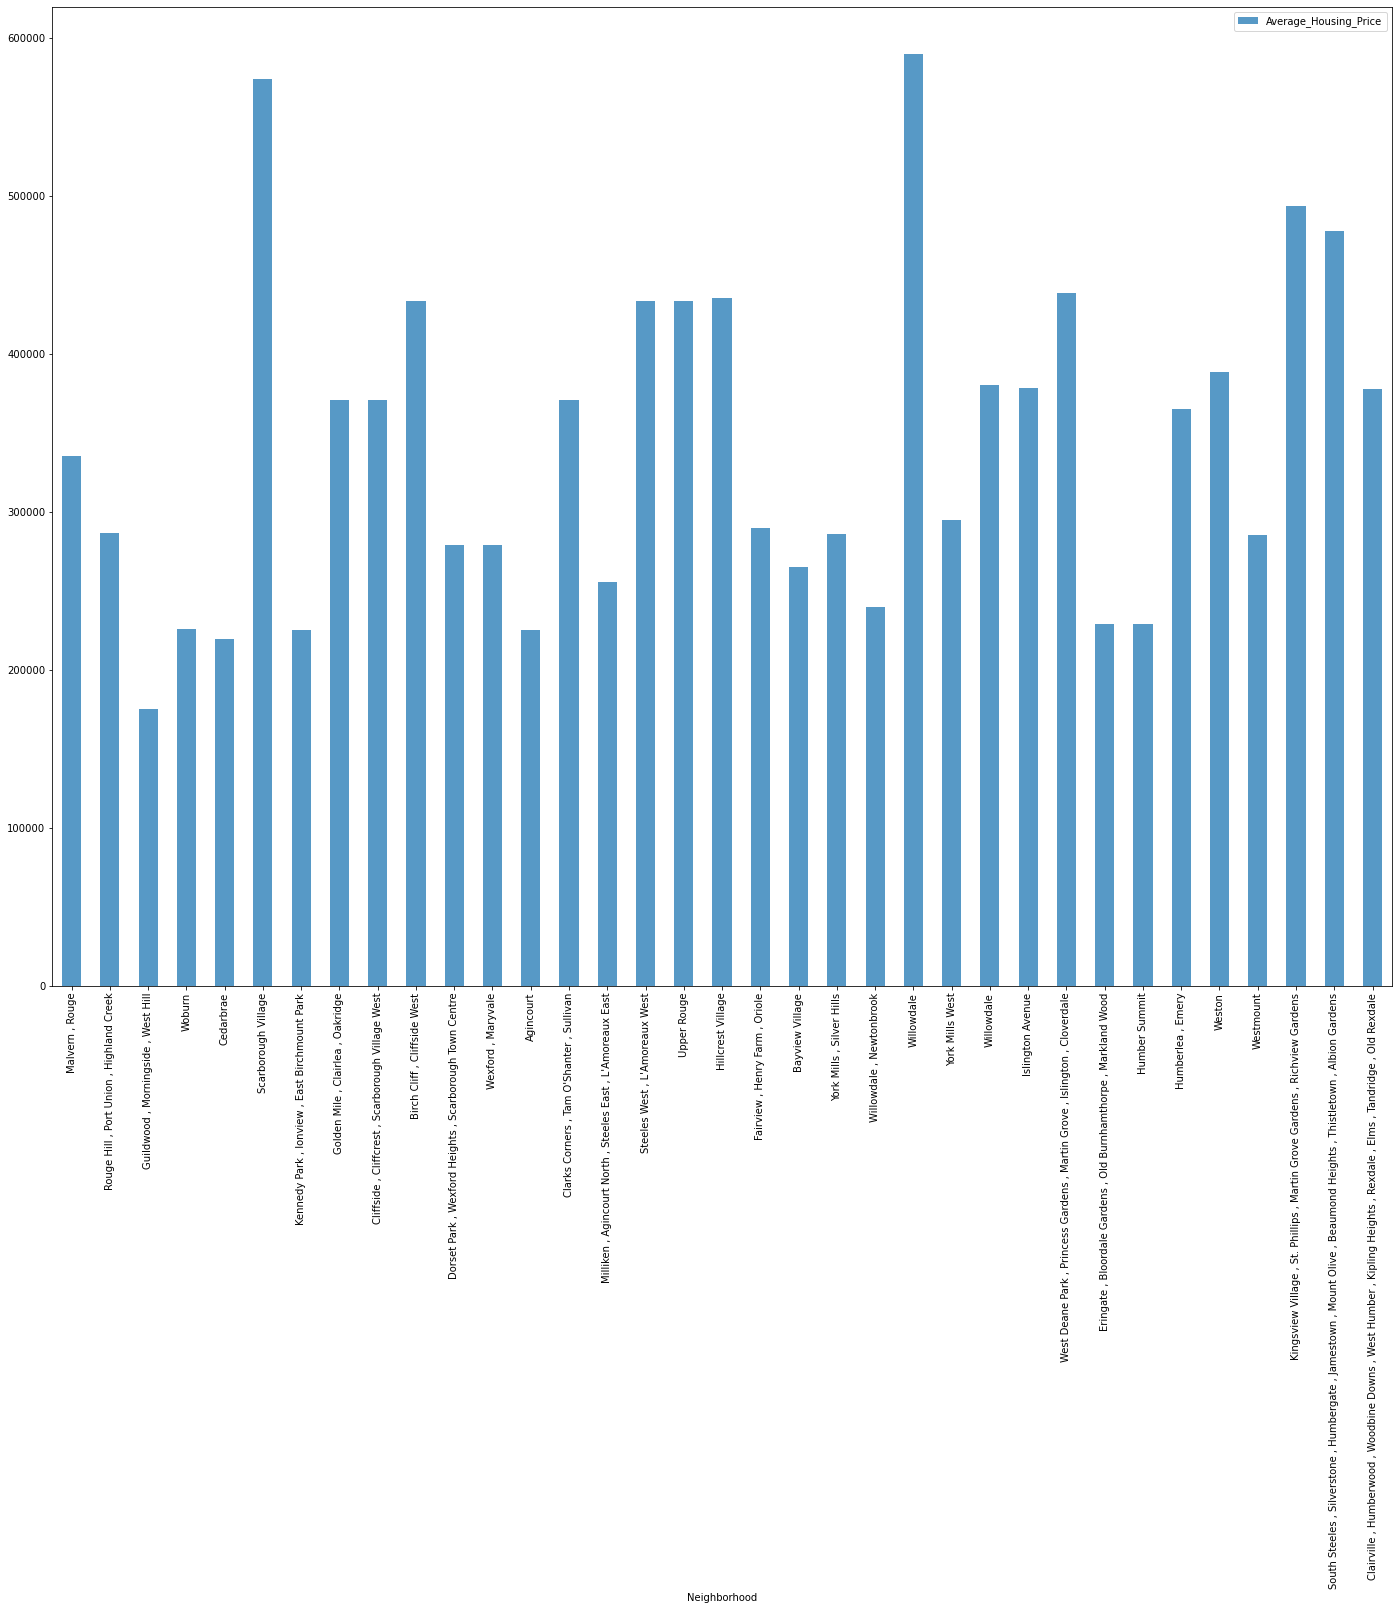

In [76]:
Scarborough_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)

In [77]:
clusters=pd.DataFrame({"Cluster1":df1["Neighborhood"],
                      "Cluster2":df2["Neighborhood"],
                      "Cluster4":df3["Neighborhood"]})
clusters = clusters.replace(np.nan, '', regex=True)

In [83]:
new_Scarborough=Scarborough_merged.set_index("Neighborhood",drop=True)
#Source:https://www.greatschools.org
Scarborough_school_ratings=pd.DataFrame({"Neighborhood":df["Neighborhood"],
                                      "Top School Rating":[7, 9, 5, 8, 10, 10, 7, 10, 1, 2, 1, 2, 7, 2, 3, 2, 6, 5, 4, 8
                                                           ]})

In [82]:
ar= [7,9,5,8,10,10,7,10,1,2,1,2,7,2,3,2,6,
                                                           5,4,8,9,9,6,6,4,5,4,6,8,10,8,9,6,2,
                                                           10,2,5,8,9,6,6,10,8,9,1,2,3,4,5,6,9,
                                                           8,5,9,6,9,6,4,8,10,2,5,6,3,9,8,7,
                                                           7,8,5,8,9,1,5,4,7,2,3,6,6,9,4,8,7,
                                                           4,8,9,2,6,4,7,5,10,4,6,8,9,7,5,6,5,8,7]
ar1 =[]
for x in range(0,20):
    ar1.append(ar[x])
print(ar1)
print(len(ar1))

[7, 9, 5, 8, 10, 10, 7, 10, 1, 2, 1, 2, 7, 2, 3, 2, 6, 5, 4, 8]
20


In [84]:
Scarborough_school_ratings.set_index('Neighborhood',inplace=True,drop=True)

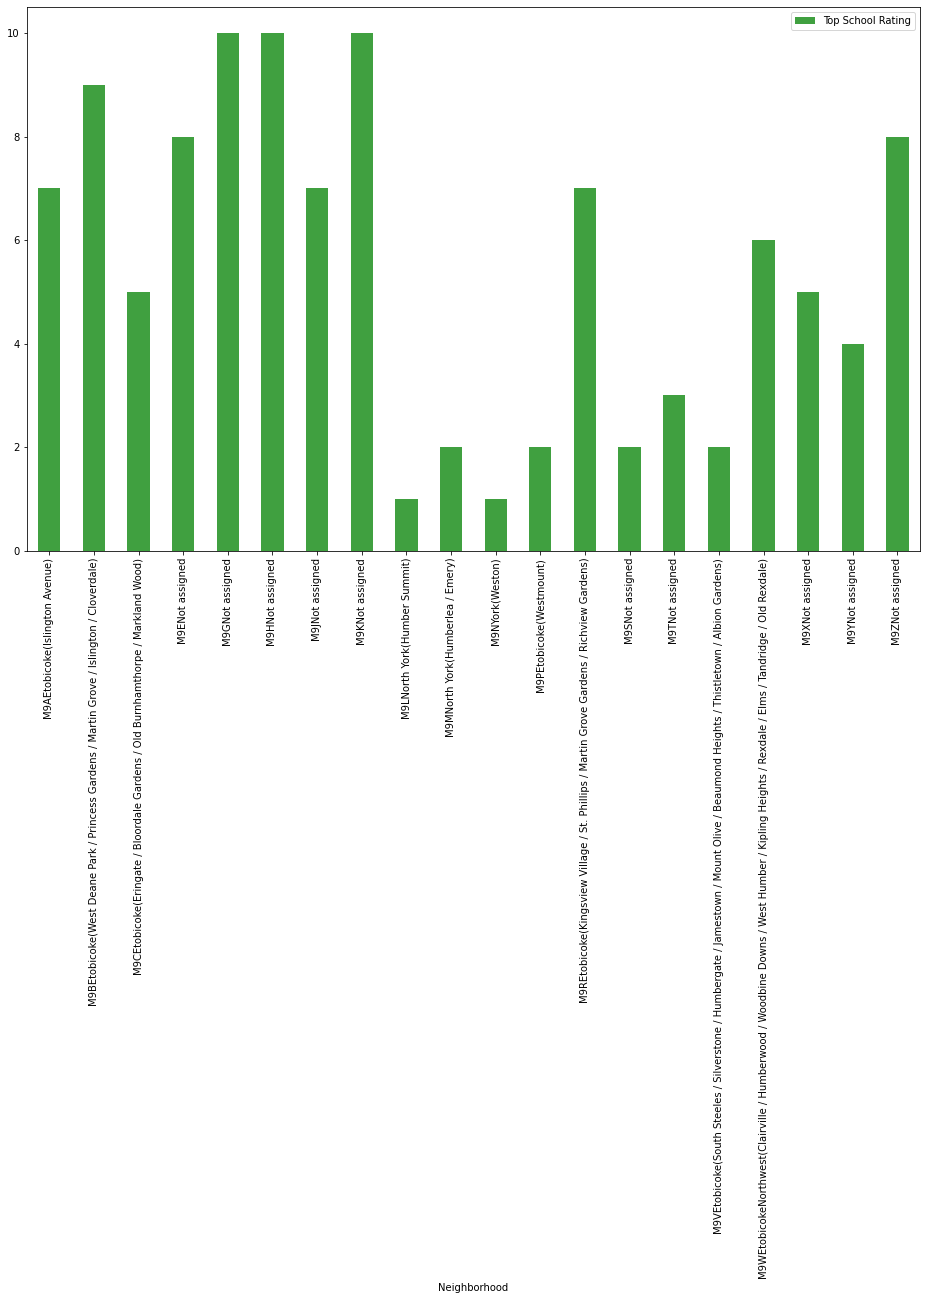

In [85]:
Scarborough_school_ratings.plot(kind='bar',figsize=(16,10),color='green',alpha=0.75);